<a href="https://colab.research.google.com/github/rgunasree/wine-qualityy-analysis-/blob/main/wine_quality_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load the dataset
df = pd.read_excel('/content/wine_quality.xlsx')

In [3]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [4]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [7]:
# Normalize the data
norm = MinMaxScaler()
df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = norm.fit_transform(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

In [8]:
# Create a new column 'best quality' based on the quality column
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [9]:
# Encode categorical variables
df.replace({'white': 1, 'red': 0}, inplace=True)

In [10]:
# Split the dataset into features and target variable
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

In [11]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

In [12]:
# Normalize the data
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [13]:
# Train a RandomForestClassifier model
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(x_train, y_train)

In [14]:
# Predict the target variable
y_predict = rnd.predict(x_test)

In [15]:
# Evaluate the model
rnd_score = rnd.score(x_test, y_test)
print('Score of the model: ', rnd_score)

Score of the model:  0.828125


In [17]:
# Calculate mean squared error and root mean squared error
rnd_MSE = mean_squared_error(y_test, y_predict)
rnd_RMSE = np.sqrt(rnd_MSE)
print('Mean squared error: ', rnd_MSE)
print('Root mean squared error: ', rnd_RMSE)

Mean squared error:  0.171875
Root mean squared error:  0.414578098794425


In [18]:
# Print classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       147
           1       0.84      0.84      0.84       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



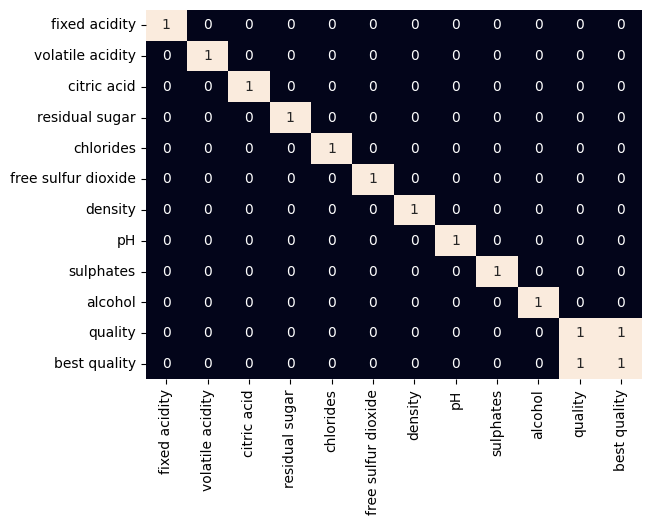

In [19]:
# Create a heatmap to visualize highly correlated features
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [23]:
print(df.columns)

# Remove highly correlated features
df = df.drop('citric acid', axis=1)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'best quality'],
      dtype='object')
